On this Notebook, the data is read, and some interesting variables are further examined to understand their meaning, if they are categorical, numerical or indexes, as well as the possible values that it may take.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Datasets/MLBPitcherRemovalData.csv')
data.head()

,start_id,pbp_idx,game_id,top_bot,inning,batter_stands,pitcher_id,throws,EventType,postouts,...,score_diff,tying_run_on,total_outs_recorded,total_bases_allowed,next_batter_hand,opposite_hand,end_of_inning,previously_walk,consec_walks,last_batter
0,2019/04/01/anamlb-seamlb-1_433587,1,2019/04/01/anamlb-seamlb-1,Y,1,L,433587,R,field_out,1,...,0,0,0,0,R,0.0,0,0,0,0
1,2019/04/01/anamlb-seamlb-1_433587,2,2019/04/01/anamlb-seamlb-1,Y,1,R,433587,R,hit_by_pitch,1,...,0,0,1,0,L,1.0,0,0,0,0
2,2019/04/01/anamlb-seamlb-1_433587,3,2019/04/01/anamlb-seamlb-1,Y,1,L,433587,R,force_out,2,...,0,0,1,1,R,0.0,0,0,0,0
3,2019/04/01/anamlb-seamlb-1_433587,4,2019/04/01/anamlb-seamlb-1,Y,1,R,433587,R,field_out,3,...,0,0,2,1,R,0.0,1,0,0,0
4,2019/04/01/anamlb-seamlb-1_433587,5,2019/04/01/anamlb-seamlb-1,Y,2,R,433587,R,single,0,...,4,0,3,1,L,1.0,0,0,0,0


In [3]:
data.shape

(49521, 30)

In [4]:
data.last_batter.sum()

2177

In [5]:
len(data.game_id.unique())

1174

In [6]:
len(data.start_id.unique())

2177

In [7]:
len(data.pitcher_id.unique())

256

In [8]:
data.EventType.unique()

array(['field_out', 'hit_by_pitch', 'force_out', 'single', 'strikeout',
       'field_error', 'double', 'walk', 'grounded_into_double_play',
       'home_run', 'fielders_choice', 'sac_fly', 'other_out', 'triple',
       'intent_walk', 'double_play', 'caught_stealing_2b',
       'strikeout_double_play', 'caught_stealing_home', 'sac_bunt',
       'pickoff_1b', 'catcher_interf', 'fielders_choice_out',
       'sac_fly_double_play', 'pickoff_2b', 'runner_double_play',
       'pickoff_caught_stealing_2b', 'fan_interference',
       'caught_stealing_3b', 'triple_play', 'batter_interference',
       'pickoff_caught_stealing_home'], dtype=object)

In [9]:
data.EventType.value_counts()

field_out                       20012
strikeout                       10608
single                           7051
walk                             3568
double                           2380
home_run                         1993
grounded_into_double_play         909
force_out                         905
hit_by_pitch                      489
field_error                       365
sac_fly                           283
triple                            225
other_out                         124
double_play                       108
sac_bunt                           99
fielders_choice                    98
fielders_choice_out                74
caught_stealing_2b                 58
strikeout_double_play              54
intent_walk                        43
catcher_interf                     18
pickoff_caught_stealing_2b         17
pickoff_1b                         13
sac_fly_double_play                 5
caught_stealing_home                5
caught_stealing_3b                  4
fan_interfer

Next, we work with the variables involving the hand of both the pitcher and the batter.

In [10]:
data[['throws', 'next_batter_hand', 'opposite_hand']]

,throws,next_batter_hand,opposite_hand
0,R,R,0.0
1,R,L,1.0
2,R,R,0.0
3,R,R,0.0
4,R,L,1.0
...,...,...,...
49516,L,R,1.0
49517,L,R,1.0
49518,L,L,0.0
49519,L,R,1.0


In [11]:
(data['throws']!=data['next_batter_hand']).sum()

29246

In [12]:
data['opposite_hand'].sum()

29235.0

In [13]:
data.next_batter_hand.unique()

array(['R', 'L', nan], dtype=object)

There are missing values! Are there more missing for other variables?

In [14]:
data.isnull().sum(axis=0)

start_id                  0
pbp_idx                   0
game_id                   0
top_bot                   0
inning                    0
batter_stands             0
pitcher_id                0
throws                    0
EventType                 0
postouts                  0
post_runner_on_first      0
post_runner_on_second     0
post_runner_on_third      0
PostVisTeamScore          0
PostHomeTeamScore         0
home_away                 0
pitches_in_pa             0
pitch_total               0
er_total                  0
runners_on_base           0
score_diff                0
tying_run_on              0
total_outs_recorded       0
total_bases_allowed       0
next_batter_hand         11
opposite_hand            11
end_of_inning             0
previously_walk           0
consec_walks              0
last_batter               0
dtype: int64

In [15]:
data.loc[data.next_batter_hand.isna(), ['next_batter_hand', 'last_batter']]

,next_batter_hand,last_batter
8388,NaN,1
17989,NaN,1
22880,NaN,1
25444,NaN,1
25776,NaN,1
27663,NaN,1
28309,NaN,1
32986,NaN,1
43471,NaN,1
46615,NaN,1


They are all the last batters! However, to see if pitchers were changed in part due the next batter hand, we must fill the missing values, or deleting them. After research, the values will be manually filled with the true value.

Next, is there any relationship betweeen the top/bottom of an inning and the Home/Away team?

In [16]:
pd.crosstab(data["top_bot"], data["home_away"])

home_away,Away,Home
top_bot,,
N,24890,0
Y,0,24631


They have collinearity! Makes sense since the home team pitches on the top of the inning. 

In [17]:
data[['postouts', 'total_outs_recorded']].max()

postouts                3
total_outs_recorded    26
dtype: int64

In [18]:
(np.abs(data['PostVisTeamScore'] - data['PostHomeTeamScore']) == data['score_diff']).sum()

32683

They do not always match! Why?

In [19]:
not_equal = ~(np.abs(data['PostVisTeamScore'] - data['PostHomeTeamScore']) == data['score_diff'])
scores_vars = ['PostVisTeamScore', 'PostHomeTeamScore', 'score_diff']

data.loc[not_equal, scores_vars]

,PostVisTeamScore,PostHomeTeamScore,score_diff
27,0,1,-1
28,0,1,-1
29,0,1,-1
30,0,2,-2
31,0,4,-4
...,...,...,...
49516,0,2,-2
49517,0,2,-2
49518,0,2,-2
49519,0,2,-2


In [20]:
((data['PostVisTeamScore'] - data['PostHomeTeamScore']) == data['score_diff']).sum()

33129

In [21]:
(np.abs(data['PostVisTeamScore'] - data['PostHomeTeamScore']) == np.abs(data['score_diff'])).sum()

49521

Again, they do not match! By definition, _score_diff_ is the "difference in runs scored between the pitcher’s team and the batting team". We may assume that this is because the database has both home and away pitchers.
Is there any easy way to know if the pitcher is at home or away?

In [22]:
data['pitch_total'].max()

131

In [23]:
data[['score_diff','post_runner_on_third', 'tying_run_on']].head(20)

,score_diff,post_runner_on_third,tying_run_on
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,4,0,0
5,4,0,0
6,4,1,0
7,3,0,0
8,3,0,0
9,3,0,0


As seen on plates appearances 17 and 18, whenever the score difference is 1 and there is a player on third base, the 'tying_run_on' is  1. Can it be when 1 the difference is more than 1 point?

In [24]:
data.loc[data['tying_run_on']==1, ['score_diff','post_runner_on_third', 'post_runner_on_second', 'tying_run_on']]

,score_diff,post_runner_on_third,post_runner_on_second,tying_run_on
17,1,1,0,1
18,1,1,0,1
23,1,0,0,1
24,1,0,1,1
174,1,0,0,1
...,...,...,...,...
49502,1,0,1,1
49503,1,0,1,1
49504,1,0,1,1
49505,1,0,1,1


Not necesarily on third base, but on any base.

In [25]:
data.loc[70:, ['previously_walk', 'consec_walks']]

,previously_walk,consec_walks
70,0,0
71,0,0
72,1,0
73,1,1
74,0,0
...,...,...
49516,0,0
49517,1,0
49518,0,0
49519,1,0


In [26]:
data.pitches_in_pa.max()

14

In [27]:
pitches=data.loc[data.last_batter==1, 'pitch_total']
pitches.min(), pitches.median(), pitches.mean(), pitches.max() 

(14, 92.0, 89.02204869085898, 131)

In [28]:
data[['start_id', 'pitches_in_pa']].groupby('start_id').sum()

,pitches_in_pa
start_id,
2019/04/01/anamlb-seamlb-1_433587,92
2019/04/01/anamlb-seamlb-1_608717,82
2019/04/01/balmlb-tormlb-1_605276,82
2019/04/01/balmlb-tormlb-1_656887,52
2019/04/01/bosmlb-oakmlb-1_456034,93
...,...
2019/09/29/minmlb-kcamlb-1_605347,79
2019/09/29/nyamlb-texmlb-1_458681,98
2019/09/29/oakmlb-seamlb-1_543699,101


In [29]:
data['inning_pa']=1
data['inning_pa']=data[['start_id', 'inning', 'inning_pa']].groupby(['start_id', 'inning']).cumsum()

In [30]:
changes=data.loc[data.last_batter==1, :]
no_changes=data.loc[data.last_batter==0, :]
changes.head()

,start_id,pbp_idx,game_id,top_bot,inning,batter_stands,pitcher_id,throws,EventType,postouts,...,tying_run_on,total_outs_recorded,total_bases_allowed,next_batter_hand,opposite_hand,end_of_inning,previously_walk,consec_walks,last_batter,inning_pa
24,2019/04/01/anamlb-seamlb-1_433587,25,2019/04/01/anamlb-seamlb-1,Y,6,R,433587,R,single,1,...,1,16,8,L,1.0,0,0,0,1,3
45,2019/04/01/anamlb-seamlb-1_608717,21,2019/04/01/anamlb-seamlb-1,N,5,R,608717,R,single,1,...,0,13,9,L,1.0,0,0,0,1,3
65,2019/04/01/balmlb-tormlb-1_605276,20,2019/04/01/balmlb-tormlb-1,N,7,R,605276,R,field_out,1,...,0,18,1,L,1.0,0,0,0,1,1
79,2019/04/01/balmlb-tormlb-1_656887,14,2019/04/01/balmlb-tormlb-1,Y,2,L,656887,R,field_out,3,...,0,5,10,R,0.0,1,0,0,1,5
104,2019/04/01/bosmlb-oakmlb-1_456034,25,2019/04/01/bosmlb-oakmlb-1,N,6,R,456034,L,field_out,3,...,0,17,17,R,1.0,1,0,0,1,5


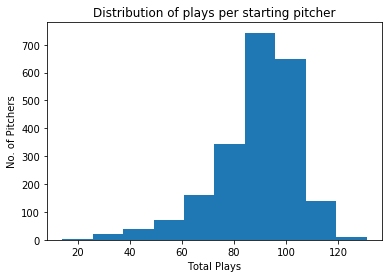

In [31]:
plt.hist(np.array(changes['pitch_total'])
plt.title('Distribution of plays per starting pitcher')
plt.xlabel('Total Plays')
plt.ylabel('No. of Pitchers')
plt.show()

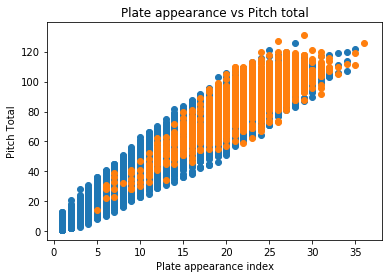

In [32]:
plt.scatter(no_changes['pbp_idx'], no_changes['pitch_total'])
plt.scatter(changes['pbp_idx'], changes['pitch_total'])
plt.title('Plate appearance vs Pitch total')
plt.xlabel('Plate appearance index')
plt.ylabel('Pitch Total')

plt.show()

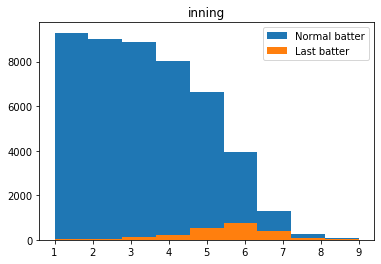

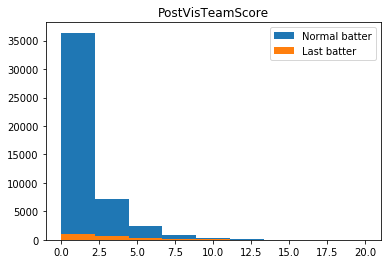

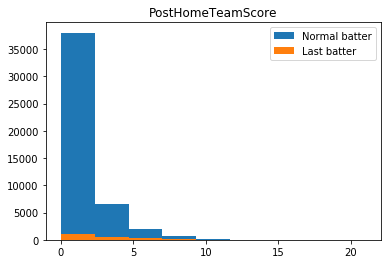

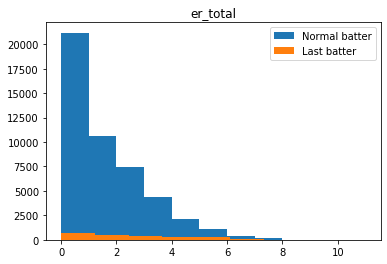

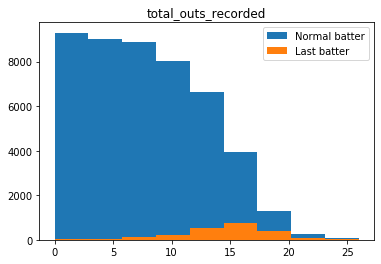

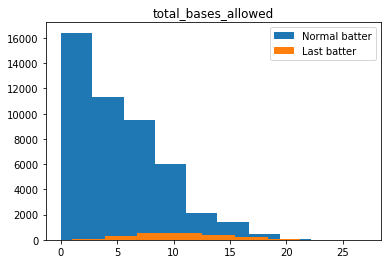

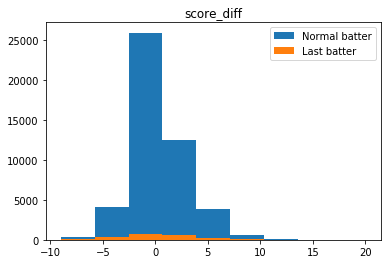

In [33]:
raw=['inning', 'PostVisTeamScore', 'PostHomeTeamScore', 'er_total', 'total_outs_recorded', 'total_bases_allowed', 'score_diff']#['inning', 'batter_stands', 'throws', 'EventType', 'PostVisTeamScore', 'PostHomeTeamScore', 'home_away', 'pitches_in_pa', 'er_total', 'total_outs_recorded', 'total_bases_allowed', 'previously_walk', 'score_diff']
for var in raw:
    plt.hist(no_changes[var], bins=9, label='Normal batter')
    plt.hist(changes[var], bins=9, label='Last batter')
    plt.title(var)
    plt.legend()
    plt.show()

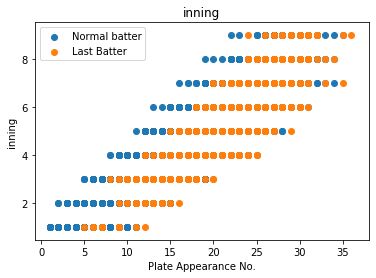

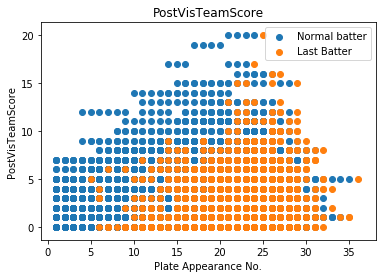

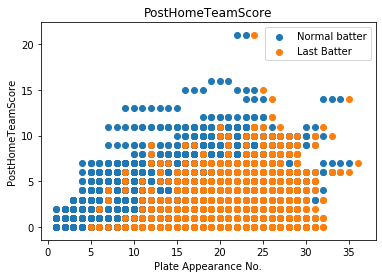

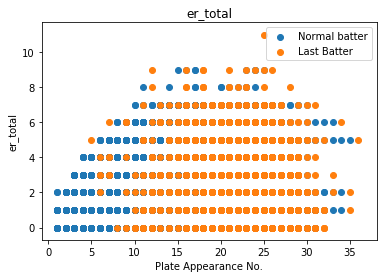

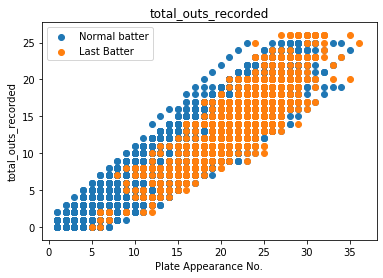

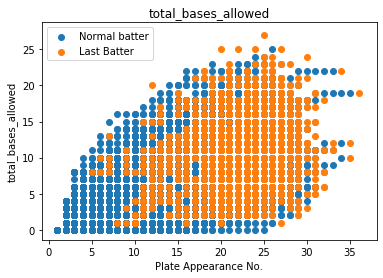

In [34]:
raw=['inning', 'PostVisTeamScore', 'PostHomeTeamScore', 'er_total', 'total_outs_recorded', 'total_bases_allowed']#, 'batter_stands', 'throws', 'EventType', 'PostVisTeamScore', 'PostHomeTeamScore', 'home_away', 'pitches_in_pa', 'er_total', 'total_outs_recorded', 'total_bases_allowed', 'previously_walk', 'score_diff']
for var in raw:
    plt.scatter(no_changes['pbp_idx'], no_changes[var], label='Normal batter')
    plt.scatter(changes['pbp_idx'], changes[var], label='Last Batter')
    plt.title(var)
    plt.ylabel(var)
    plt.xlabel('Plate Appearance No.')
    plt.legend()
    plt.show()

In [35]:
data.head()

,start_id,pbp_idx,game_id,top_bot,inning,batter_stands,pitcher_id,throws,EventType,postouts,...,tying_run_on,total_outs_recorded,total_bases_allowed,next_batter_hand,opposite_hand,end_of_inning,previously_walk,consec_walks,last_batter,inning_pa
0,2019/04/01/anamlb-seamlb-1_433587,1,2019/04/01/anamlb-seamlb-1,Y,1,L,433587,R,field_out,1,...,0,0,0,R,0.0,0,0,0,0,1
1,2019/04/01/anamlb-seamlb-1_433587,2,2019/04/01/anamlb-seamlb-1,Y,1,R,433587,R,hit_by_pitch,1,...,0,1,0,L,1.0,0,0,0,0,2
2,2019/04/01/anamlb-seamlb-1_433587,3,2019/04/01/anamlb-seamlb-1,Y,1,L,433587,R,force_out,2,...,0,1,1,R,0.0,0,0,0,0,3
3,2019/04/01/anamlb-seamlb-1_433587,4,2019/04/01/anamlb-seamlb-1,Y,1,R,433587,R,field_out,3,...,0,2,1,R,0.0,1,0,0,0,4
4,2019/04/01/anamlb-seamlb-1_433587,5,2019/04/01/anamlb-seamlb-1,Y,2,R,433587,R,single,0,...,0,3,1,L,1.0,0,0,0,0,1


New column, if the game was the second on a double header. However, were there pitchers that started on both games?

In [36]:
data['double_header']=data.game_id.apply(lambda x:x[-1])

In [37]:
game_pitcher=data[['game_id', 'pitcher_id']]
game_pitcher=game_pitcher.groupby(['game_id', 'pitcher_id'])
game_pitcher=game_pitcher.count()
game_pitcher=game_pitcher.reset_index()
game_pitcher=game_pitcher.sort_values('game_id')

for i in range(len(game_pitcher)-1):
    if game_pitcher.pitcher_id[i]==game_pitcher.pitcher_id[i+1]:
        print('yes')

A pitcher never started on both games of a double header. Were there any other changes?

In [38]:
first=data.loc[data['double_header']=='1', 'pitch_total']
second=data.loc[data['double_header']=='2', 'pitch_total']

In [39]:
first.shape

(48660,)

In [40]:
print(first.mean())
print(second.mean())

47.915803534730784
47.063879210220676


They threw for the same number of pitches, on average.

In [41]:
data[['EventType', 'pitch_total']].groupby('EventType').count().reset_index().sort_values('pitch_total', ascending=False)

,EventType,pitch_total
9,field_out,20012
27,strikeout,10608
26,single,7051
31,walk,3568
5,double,2380
15,home_run,1993
13,grounded_into_double_play,909
12,force_out,905
14,hit_by_pitch,489
8,field_error,365


In [42]:
data[['EventType', 'pitch_total']].groupby('EventType').count().reset_index().sort_values('pitch_total', ascending=False)['pitch_total']/len(data)

9     0.404111
27    0.214212
26    0.142384
31    0.072050
5     0.048060
15    0.040246
13    0.018356
12    0.018275
14    0.009875
8     0.007371
24    0.005715
29    0.004544
17    0.002504
6     0.002181
23    0.001999
10    0.001979
11    0.001494
2     0.001171
28    0.001090
16    0.000868
1     0.000363
20    0.000343
18    0.000263
25    0.000101
4     0.000101
3     0.000081
19    0.000061
7     0.000061
30    0.000061
22    0.000040
21    0.000020
0     0.000020
Name: pitch_total, dtype: float64

Is there any difference on the next batter?

In [43]:
print('Distribution of no changes:')
print(no_changes['next_batter_hand'].value_counts()/len(no_changes) )

print('Distribution of changes:')
print(changes['next_batter_hand'].value_counts()/len(changes) )


Distribution of no changes:
R    0.595408
L    0.404592
Name: next_batter_hand, dtype: float64
Distribution of changes:
R    0.579237
L    0.415710
Name: next_batter_hand, dtype: float64


Not very visible. Maybe if they throw opposite?

In [44]:
print('Percentage of next opposing hand during changes: ', changes['opposite_hand'].mean())
print('Percentage of next opposing hand during normal plays: ', no_changes['opposite_hand'].mean())

Percentage of next opposing hand during changes:  0.6440443213296398
Percentage of next opposing hand during normal plays:  0.5880364988171679


There seem to be an influence if the next batter uses the opposite hand.

When is the pitcher being pulled off? At the beginning of the inning, middle or end? 
(That may influence wheteher to use an accumulate of the variables on current inning as a training variable)

In [45]:
changes.head()

,start_id,pbp_idx,game_id,top_bot,inning,batter_stands,pitcher_id,throws,EventType,postouts,...,tying_run_on,total_outs_recorded,total_bases_allowed,next_batter_hand,opposite_hand,end_of_inning,previously_walk,consec_walks,last_batter,inning_pa
24,2019/04/01/anamlb-seamlb-1_433587,25,2019/04/01/anamlb-seamlb-1,Y,6,R,433587,R,single,1,...,1,16,8,L,1.0,0,0,0,1,3
45,2019/04/01/anamlb-seamlb-1_608717,21,2019/04/01/anamlb-seamlb-1,N,5,R,608717,R,single,1,...,0,13,9,L,1.0,0,0,0,1,3
65,2019/04/01/balmlb-tormlb-1_605276,20,2019/04/01/balmlb-tormlb-1,N,7,R,605276,R,field_out,1,...,0,18,1,L,1.0,0,0,0,1,1
79,2019/04/01/balmlb-tormlb-1_656887,14,2019/04/01/balmlb-tormlb-1,Y,2,L,656887,R,field_out,3,...,0,5,10,R,0.0,1,0,0,1,5
104,2019/04/01/bosmlb-oakmlb-1_456034,25,2019/04/01/bosmlb-oakmlb-1,N,6,R,456034,L,field_out,3,...,0,17,17,R,1.0,1,0,0,1,5


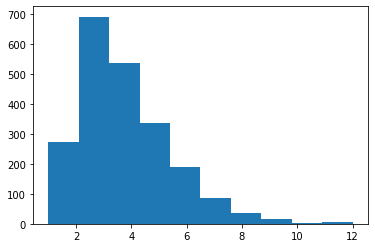

end_of_inning    0.570051
inning_pa        3.957740
dtype: float64

In [46]:
pa_changes = changes[['end_of_inning', 'inning_pa']]
plt.hist(pa_changes.inning_pa)
plt.show()
pa_changes.mean()

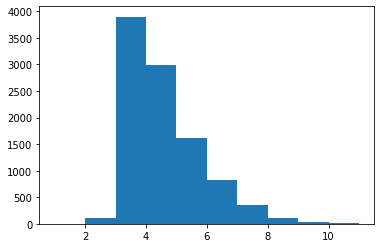

4.093240796620399

In [47]:
pa_nochanges = no_changes.loc[no_changes['end_of_inning']==1, 'inning_pa']
plt.hist(pa_nochanges)
plt.show()
pa_nochanges.mean()

There is a slightly difference on the mean number of plate appearances when they changed. The distribution also changes slightly. Therefore, it may be a good idea to include variables not only accumulating through the whole game, but also the distribution of their value thorugh the same inning. 
This is confirmed as only 57% of the end of pitchers were changed at the inning that they were playing.

What players scored more at the time of player change? The Home or the Away team?

In [48]:
print(changes.PostVisTeamScore.median())
print(changes.PostVisTeamScore.mean())
print(changes.PostHomeTeamScore.median())
print(changes.PostHomeTeamScore.mean())

2.0
2.9485530546623795
2.0
2.766192007349564


In [49]:
Home=changes.loc[changes.home_away=='Home',:]
Away=changes.loc[changes.home_away=='Away',:]

print('Home team score difference: ', Home.score_diff.mean())
print('Away team score difference: ', Away.score_diff.mean())

Home team score difference:  -0.08940092165898618
Away team score difference:  0.27472527472527475


The Home Away performs slightly worse at the time of change! Did they lasted more or less?

In [50]:
print('Home plates appearances: ', Home.pbp_idx.mean())
print('Away plates appearances: ', Away.pbp_idx.mean())

Home plates appearances:  22.70138248847926
Away plates appearances:  22.793040293040292


They performed almost the same.

In [51]:
data.head()

,start_id,pbp_idx,game_id,top_bot,inning,batter_stands,pitcher_id,throws,EventType,postouts,...,total_outs_recorded,total_bases_allowed,next_batter_hand,opposite_hand,end_of_inning,previously_walk,consec_walks,last_batter,inning_pa,double_header
0,2019/04/01/anamlb-seamlb-1_433587,1,2019/04/01/anamlb-seamlb-1,Y,1,L,433587,R,field_out,1,...,0,0,R,0.0,0,0,0,0,1,1
1,2019/04/01/anamlb-seamlb-1_433587,2,2019/04/01/anamlb-seamlb-1,Y,1,R,433587,R,hit_by_pitch,1,...,1,0,L,1.0,0,0,0,0,2,1
2,2019/04/01/anamlb-seamlb-1_433587,3,2019/04/01/anamlb-seamlb-1,Y,1,L,433587,R,force_out,2,...,1,1,R,0.0,0,0,0,0,3,1
3,2019/04/01/anamlb-seamlb-1_433587,4,2019/04/01/anamlb-seamlb-1,Y,1,R,433587,R,field_out,3,...,2,1,R,0.0,1,0,0,0,4,1
4,2019/04/01/anamlb-seamlb-1_433587,5,2019/04/01/anamlb-seamlb-1,Y,2,R,433587,R,single,0,...,3,1,L,1.0,0,0,0,0,1,1


In [52]:
data['batter_order']=data['pbp_idx']%9
batters=pd.crosstab(data.batter_order, data.last_batter, margins=True)
batters['percent']=batters[1]/batters['All']
batters

last_batter,0,1,All,percent
batter_order,,,,
0,4235,237,4472,0.052996
1,6232,180,6412,0.028072
2,6016,216,6232,0.034660
3,5794,222,6016,0.036902
4,5570,224,5794,0.038661
5,5285,285,5570,0.051167
6,5011,274,5285,0.051845
7,4729,282,5011,0.056276
8,4472,257,4729,0.054346


There *is* a difference on change percentage between the different batter orders, so it will be interesting to include that variable. 